In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors


import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
import scselpy as scS

In [3]:
vedo = sc.read("normalized_vedo.h5ad")

In [4]:

#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


In [5]:
#plt.rcParams['figure.dpi'] = 350

In [6]:

ext = ".png"
colors_v = sc.pl.palettes.vega_20
sc.set_figure_params(dpi_save=450,fontsize=13)

plt.rcParams['figure.figsize']=(4,4)

plt.rcParams['axes.grid'] = False

In [7]:


def Plotting_Barplot(AllDict,obs_inp,gene,gene_list_x_axis_set,ylabelStr,save=None,bbox_to_anchor=None,bbox_to_anchor2=None,color_start=0,TitleStr = None,Legends=True,colors_v=sc.pl.palettes.vega_20,set_ylim=None):
    import matplotlib
    backup_fig_size = plt.rcParams['figure.figsize'].copy()
    plt.rcParams['figure.figsize'] = (4,4)



    fig, ax = plt.subplots()

    ax.grid(visible=False)
    SpaceBetween = 0.1

    SpaceBetween = 1-SpaceBetween 

    barwidth = (SpaceBetween/len(AllDict))

    legend_list = []
    legend_label = []
    for num,Entry in enumerate(AllDict):
        color_int = num + color_start

        add = ((1-SpaceBetween)/2)+(num/len(AllDict))*SpaceBetween

        ax.bar([round(x+add,2) for x in range(len(AllDict[Entry]))],AllDict[Entry],width = barwidth,label = Entry,color=colors_v,edgecolor=colors_v)


    xvalues_of_bars = [xf.get_x() for xf in ax.get_children() if type(xf) == matplotlib.patches.Rectangle]
    value = (xvalues_of_bars[0]+0.5*SpaceBetween)
    if Legends:
        plt.legend(loc=1,bbox_to_anchor=bbox_to_anchor)
    if TitleStr == None:
        try:
            TitleStr = obs_inp+"_vs_"+gene
        except:
            TitleStr = ""
    SecondTS = ""
    

    plt.title(TitleStr+SecondTS,pad=12)
    plt.ylabel(ylabelStr)
    
    

    plt.xticks([x+value for x in range(len(gene_list_x_axis_set))],gene_list_x_axis_set,rotation=20)

    if set_ylim != None:
        ax.set_ylim(set_ylim)
    if save != None:
        plt.savefig(save,bbox_inches='tight')
    plt.show()
    
    plt.rcParams['figure.figsize'] = backup_fig_size
    
def GetBarPlot(adata,obs_inp,gene,save=None,var_inp="var_names",bbox_to_anchor=None,bbox_to_anchor2=None,color_start=0,TitleStr = None,Legends=None,colors_v=sc.pl.palettes.vega_20,set_ylim=None,use_raw=True,layer_key=None,obs_list_x_axis_set=None):
    import scselpy
    AllDict={}
    AllDict[gene] = []
    
    Out = scS.tl.calculate_TPM(adata,obs_inp,gene,which_var=var_inp,use_raw=False,layer_key=layer_key)

    obs_list_x_axis=[]
    ylabelStr = "$"+gene+"$ TPM"
    if obs_list_x_axis_set == None:
        
        for key in Out:
            AllDict[gene].append(Out[key])
            obs_list_x_axis.append(key)
    else:
        
        for key in obs_list_x_axis_set:
            AllDict[gene].append(Out[key])
            obs_list_x_axis.append(key)

    
    
    
    Plotting_Barplot(AllDict,obs_inp,gene,obs_list_x_axis,ylabelStr,bbox_to_anchor=bbox_to_anchor,bbox_to_anchor2=bbox_to_anchor2,set_ylim=set_ylim,color_start=color_start,TitleStr = TitleStr,Legends=Legends,colors_v=colors_v,save=save)
    
    
    
    
    
    

## Figure 1

In [8]:
CMdict = {'CCR7':{'umap':[[(9.52504996505079, 7.712734409989112), (6.2613002656965335, 5.799763774319203), (5.12805384230964, 0.1317026315935408), (1.2750160027941977, -0.47052886482105993), (0.8217174334394404, -3.4462609647520326), (15.935616435453005, -3.896924731315746), (15.72425649809601, 7.736613476861846)]],
               },
          
          'CX3CR1':{'umap':[[(0.9652007274494008, 0.802319673853786),
  (-0.5168159031446894, -0.16994828776191397),
  (-1.3869839270612694, -2.8918733423742764),
  (0.7130999130994526, -2.8918733423742764),
  (1.3399906116548923, -2.515396956510579),
  (2.3116711944158235, -1.950682377715034),
  (2.6251165436935437, -1.5742059918513363),
  (1.496713286293752, -1.2353772445740097)]]},
          
         'SELL':{'umap':[[(6.2613002656965335, 5.799763774319203), (5.12805384230964, 0.1317026315935408), (1.2750160027941977, -0.47052886482105993), (0.8217174334394404, -3.4462609647520326), (15.689910508275497, -3.871365550456457), (15.78057022214645, 10.865593420630264), (6.079980837954631, 10.688466509920085)]],
               }}

In [9]:
def titlefunc(gene):
    return("Normalized $\it{"+gene+"}$ UMI count per cell")

REMAP_CX3CR1 was added to anndata.uns.


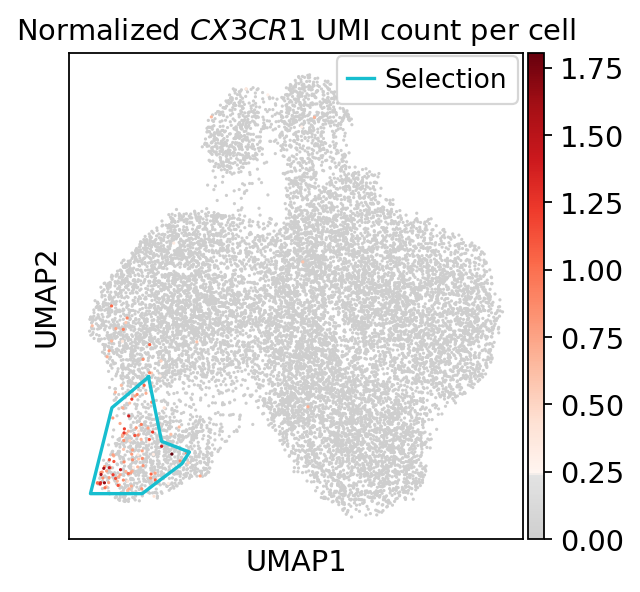

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


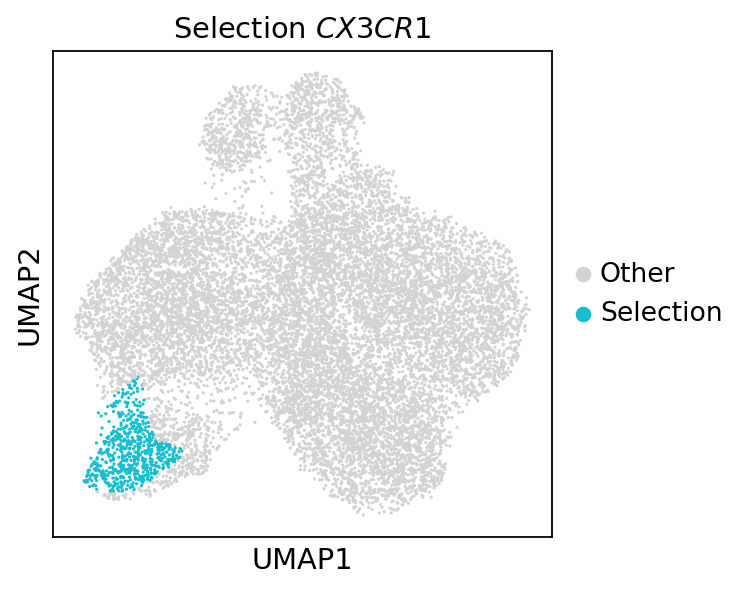

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


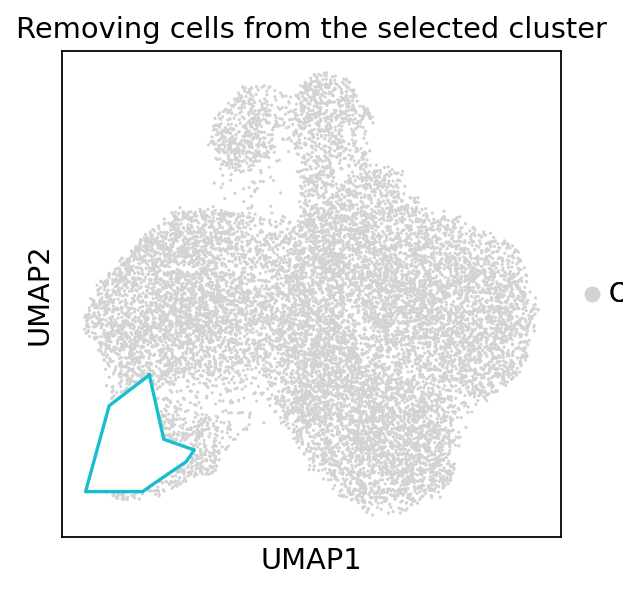

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


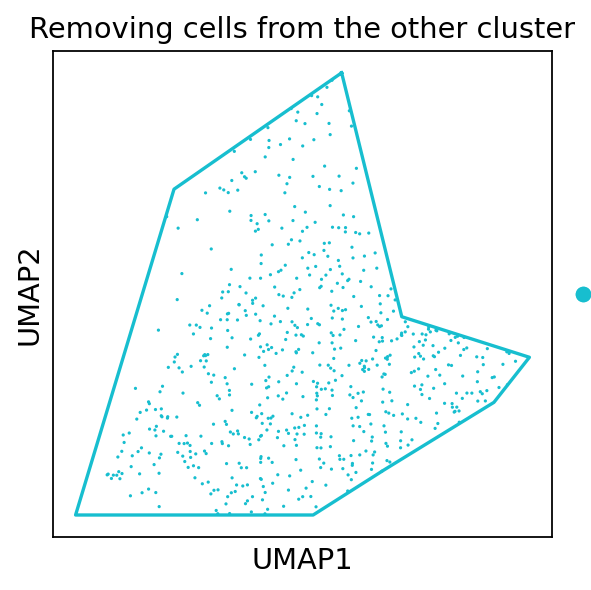

{'CX3CR1': []}
{'CX3CR1': [54.49, 0.6]}
0


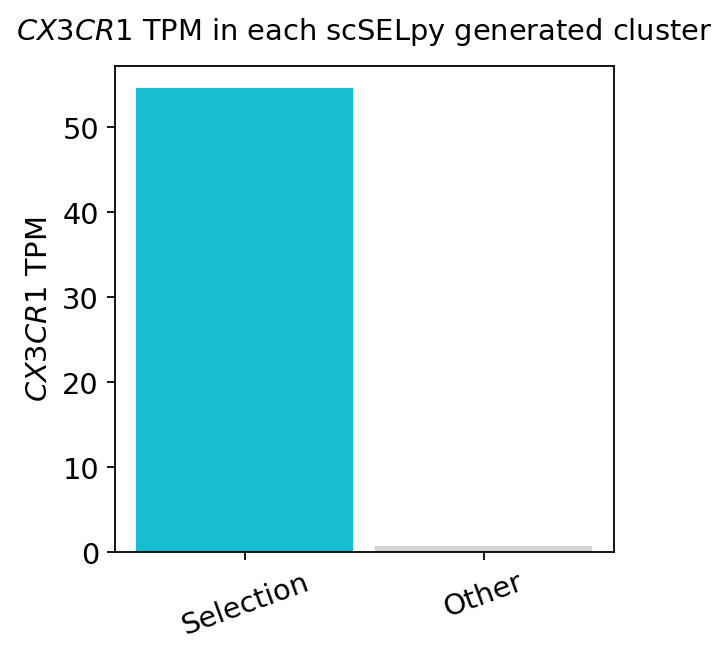

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


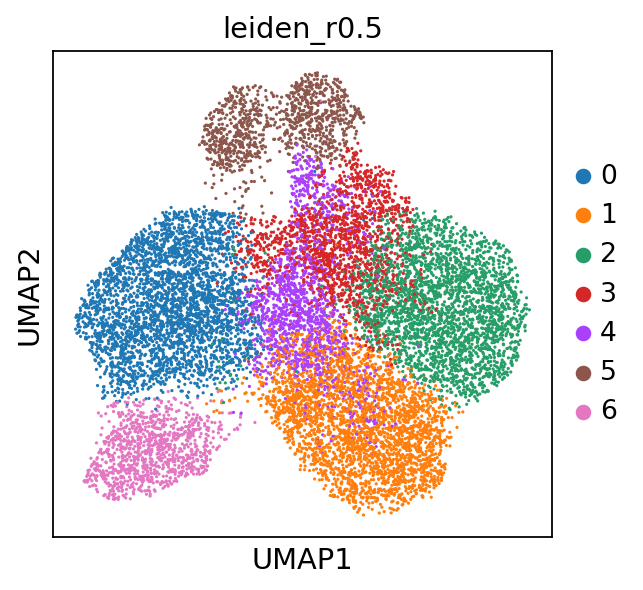

{'CX3CR1': []}
{'CX3CR1': [29.82, 0.78]}
0


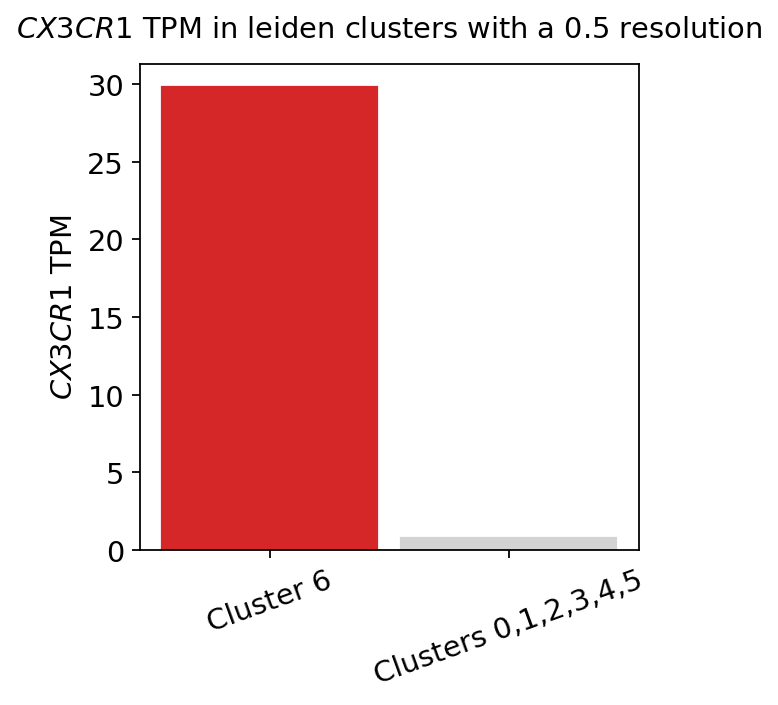

In [10]:
dotsize = 120000/len(vedo.obs)
plt.rcParams['figure.figsize']=(4,4) #rescale figures
vedo.obs['REMAP_CX3CR1'] = ["Other"]*len(vedo.obs)
try:
    del vedo.uns['REMAP_CX3CR1']
except:
    pass
scS.pl.umap(vedo,save="Figure1_1"+ext,color=["CX3CR1"],title=titlefunc("CX3CR1"),color_map=mymap,load="REMAP_CX3CR1",mock=CMdict['CX3CR1'],line_handlelength=1,line_palette=[colors_v[18]],line_labels=["Selection"],line_loc="upper left",line_bbox_to_anchor=(0.56,1.02),size=dotsize)
vedo.obs['REMAP_CX3CR1'] = ["Selection" if x != "Other" else "Other" for x in vedo.obs['REMAP_CX3CR1']]
plt.rcParams['figure.figsize']=(4,4) #rescale figures

sc.pl.umap(vedo,save="Figure1_2"+ext,color="REMAP_CX3CR1",palette=["lightgray",colors_v[18]],title="Selection $CX3CR1$",size=dotsize)
scS.pl.umap(vedo[vedo.obs['REMAP_CX3CR1'] == "Other"],save="Figure1_3"+ext, replot_lines="REMAP_CX3CR1",line_palette=[colors_v[18]],color="REMAP_CX3CR1",palette=["lightgray"],title="Removing cells from the selected cluster",size=dotsize)
scS.pl.umap(vedo[vedo.obs['REMAP_CX3CR1'] != "Other"],save="Figure1_4"+ext, replot_lines="REMAP_CX3CR1",line_palette=[colors_v[18]],color="REMAP_CX3CR1",palette=[colors_v[18]],title="Removing cells from the other cluster",size=dotsize)
#sc.pl.umap(vedo[vedo.obs['REMAP_CX3CR1'] != "Other"],save="Figure1_extra"+ext,color_map=mymap,color="CX3CR1",palette=[colors_v[18]],title="Removing cells from the other cluster",size=dotsize)



GetBarPlot(vedo,"REMAP_CX3CR1","CX3CR1",save="figures/Figure1_5"+ext,layer_key="counts",var_inp="var_names",color_start=0,TitleStr = "$CX3CR1$ TPM in each scSELpy generated cluster",Legends=False,colors_v=[sc.pl.palettes.vega_20[18],"lightgray"],obs_list_x_axis_set =["Selection","Other"])

vedo.obs["leiden_r0.5_cl6_v_rest"] = ['Cluster 6' if r == "6" else "Clusters 0,1,2,3,4,5" for r in vedo.obs['leiden_r0.5']]
sc.pl.umap(vedo,color="leiden_r0.5",save="Figure1_6"+ext,palette=sc.pl.palettes.default_20)
GetBarPlot(vedo,"leiden_r0.5_cl6_v_rest","CX3CR1",layer_key="counts",save="figures/Figure1_7"+ext,var_inp="var_names",colors_v=[colors_v[6],"lightgray"],TitleStr = "$CX3CR1$ TPM in leiden clusters with a 0.5 resolution",Legends=False)




In [11]:
import pandas

In [12]:
cpc = scS.tl.cells_per_cluster(vedo,"leiden_r0.5")
ceg = scS.tl.cells_expressing_gene(vedo,"leiden_r0.5","CX3CR1")
tpm = scS.tl.calculate_TPM(vedo,"leiden_r0.5","CX3CR1",use_raw=False,layer_key="counts")

In [13]:
a = pandas.DataFrame({a:[cpc[a],ceg[a],tpm[a]]for a in cpc}).T

In [14]:
a

0     1      2
0  22.95  0.88   2.65
1  20.91  0.03   0.07
2  19.43  0.00   0.00
3  11.24  0.00   0.00
4  10.68  0.07   0.13
5   7.48  0.46   0.98
6   7.31  9.13  29.82

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


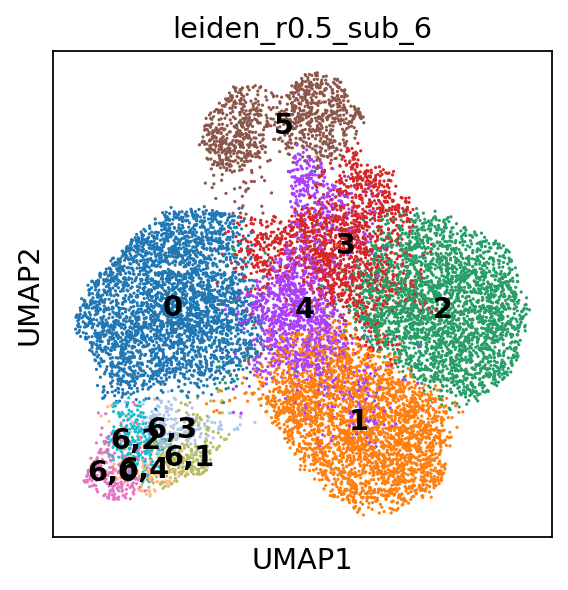

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


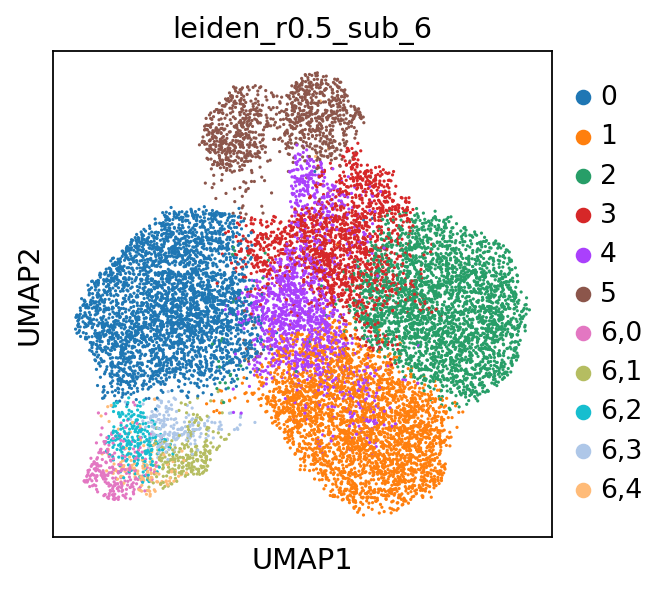

In [15]:
sc.pl.umap(vedo,color="leiden_r0.5_sub_6",legend_loc="on data",save="_Figure_1_8"+ext,palette=sc.pl.palettes.default_20)
sc.pl.umap(vedo,color="leiden_r0.5_sub_6",save="_Figure_1_10"+ext,palette=sc.pl.palettes.default_20)

{'CX3CR1': []}
{'CX3CR1': [81.99, 1.6]}
0


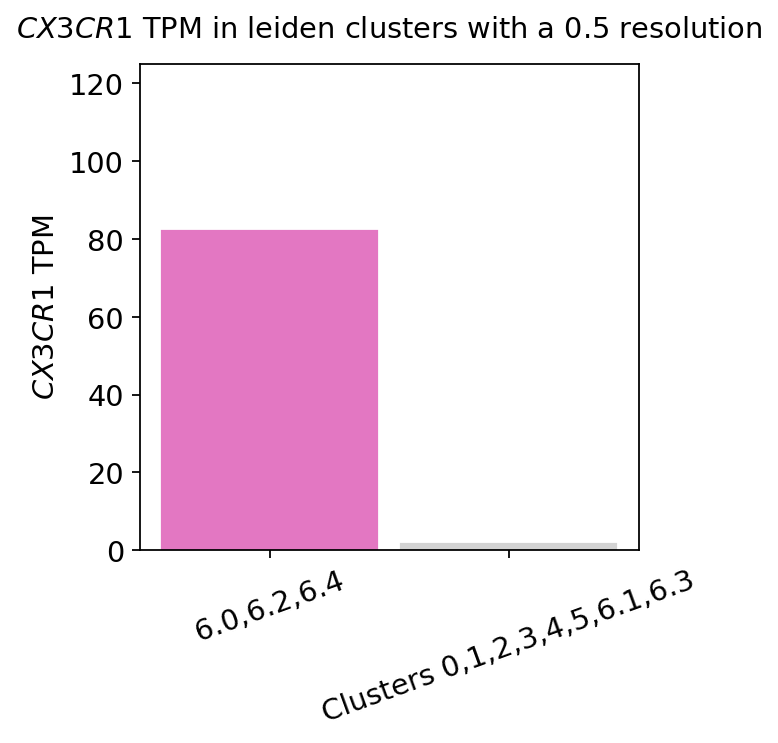

In [16]:

vedo.obs["leiden_r0.5_cl6_v_rest_sub"] = ["6.0,6.2,6.4" if "6,0" == r or "6,2" == r or "6,4" == r else "Clusters 0,1,2,3,4,5,6.1,6.3" for r in vedo.obs['leiden_r0.5_sub_6']]
GetBarPlot(vedo,"leiden_r0.5_cl6_v_rest_sub","CX3CR1",var_inp="var_names",save="Figure_1_9"+ext,colors_v=[colors_v[12],"lightgray"],set_ylim=[0,125],TitleStr = "$CX3CR1$ TPM in leiden clusters with a 0.5 resolution",Legends=False)


## Figure 2

REMAP_1 was added to anndata.obs.
REMAP_1 was added to anndata.uns.


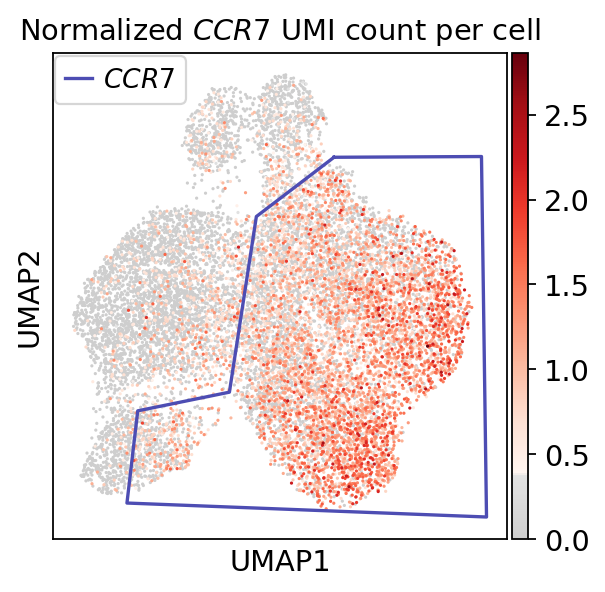

In [17]:
scS.pl.umap(vedo,color=["CCR7"],color_map=mymap,mock=CMdict['CCR7'],title=titlefunc("CCR7"),save="Figure2_1"+ext,line_palette=[(0.3,0.3,0.7,1)],line_labels=["$CCR7$"],line_loc="upper left",line_handlelength=1,line_bbox_to_anchor=(-0.025,1.02))


REMAP_CM was added to anndata.uns.


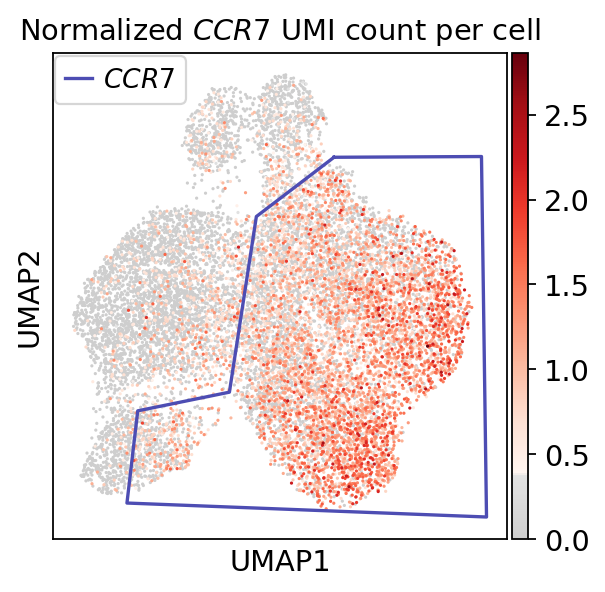

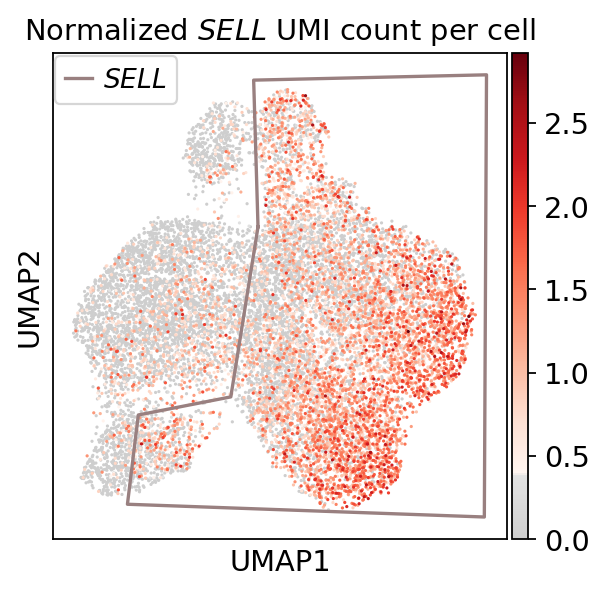

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


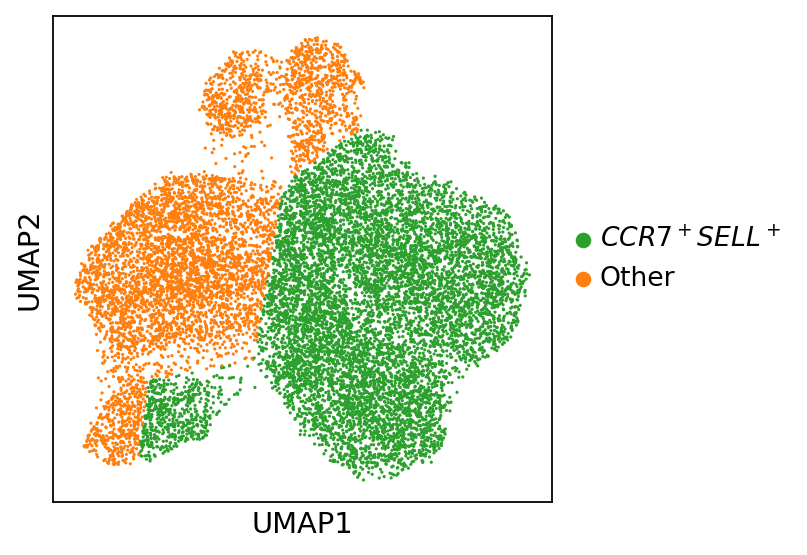

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


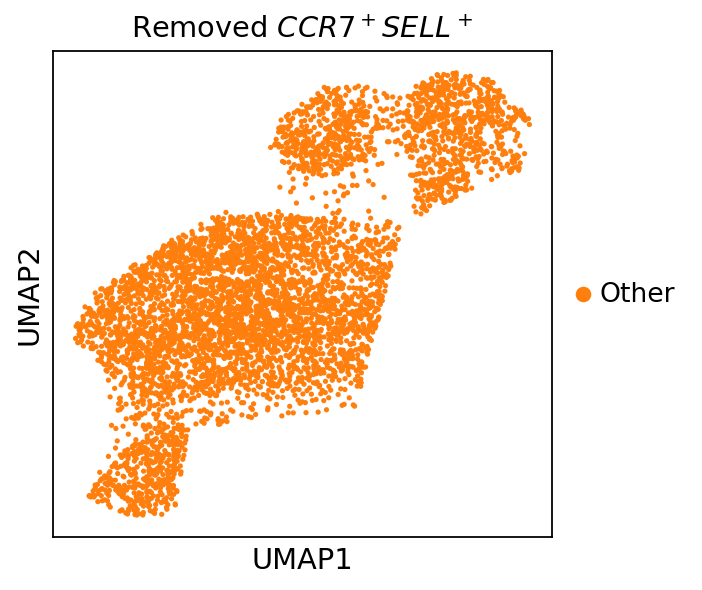

In [18]:
vedo.obs['REMAP_CM'] = ["Other"]*len(vedo.obs)
scS.pl.umap(vedo,color=["CCR7"],color_map=mymap,load="REMAP_CM",mock=CMdict['CCR7'],title=titlefunc("CCR7"),save="Figure2_1"+ext,line_palette=[(0.3,0.3,0.7,1)],line_labels=["$CCR7$"],line_loc="upper left",line_handlelength=1,line_bbox_to_anchor=(-0.025,1.02))
scS.pl.umap(vedo,color=["SELL"],color_map=mymap,load="REMAP_CM",mock=CMdict['SELL'],title=titlefunc("SELL"),save="Figure2_2"+ext,line_palette=[(0.6,0.5,0.5,1)],line_labels=["$SELL$"],line_loc="upper left",line_handlelength=1,line_bbox_to_anchor=(-0.025,1.02))
vedo.obs['REMAP_CM'] = ["$CCR7^+SELL^+$" if l == "1,2" else "Other" for l in vedo.obs['REMAP_CM']]
sc.pl.umap(vedo,color="REMAP_CM",palette=[colors_v[4],colors_v[2]],title="",save="Figure2_3"+ext)
EM = vedo[vedo.obs['REMAP_CM'] != "$CCR7^+SELL^+$"]
sc.pl.umap(EM,color="REMAP_CM",palette=[colors_v[2]],title="Removed $CCR7^+SELL^+$",save="Figure2_4"+ext)

All_cells was added to anndata.uns.


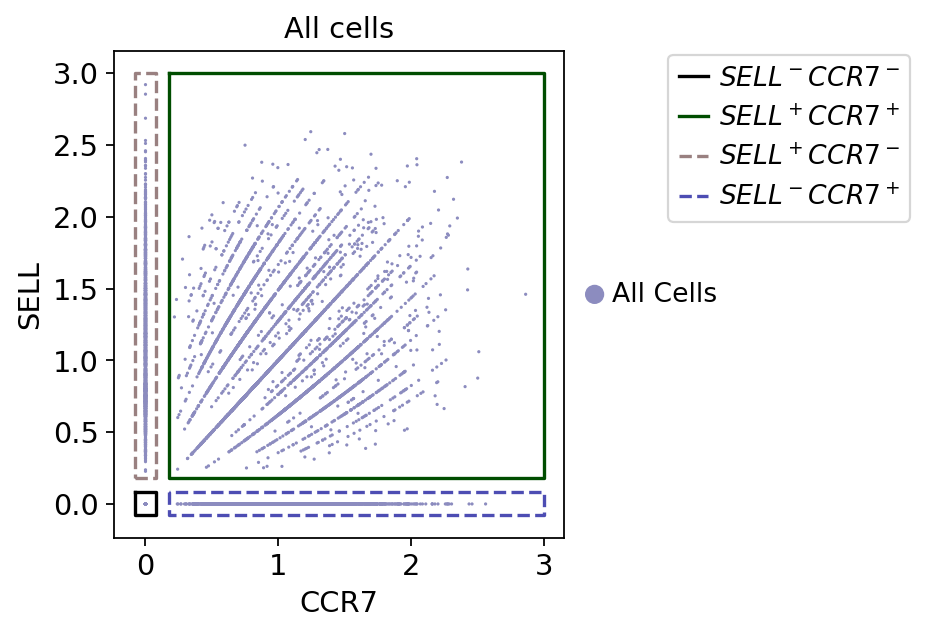

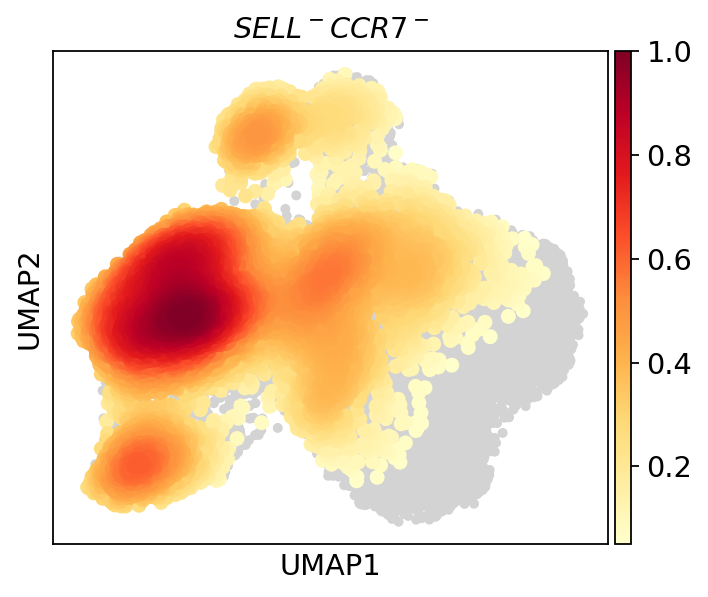

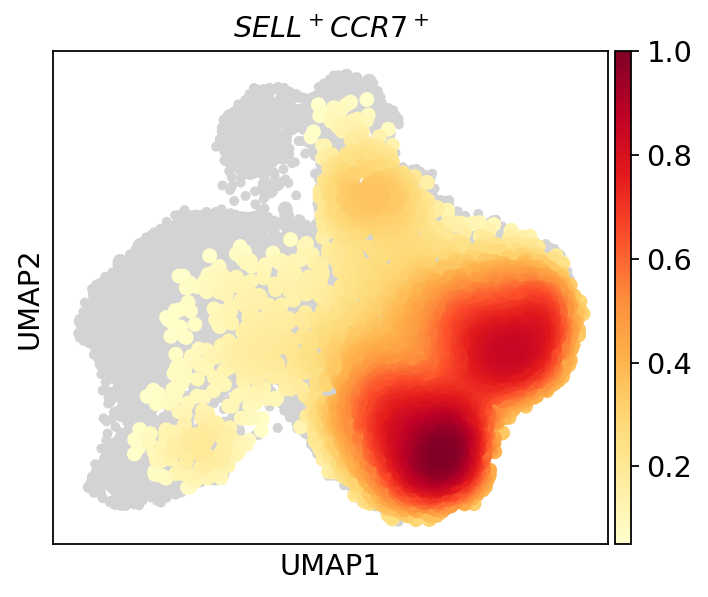

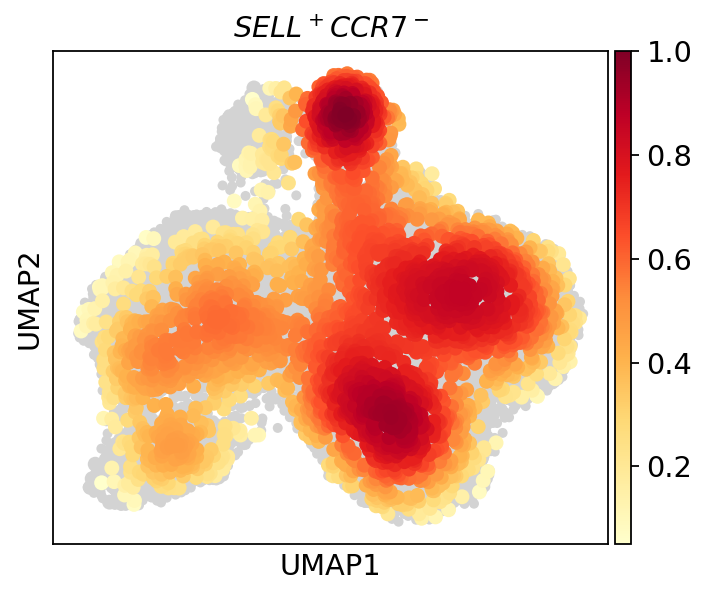

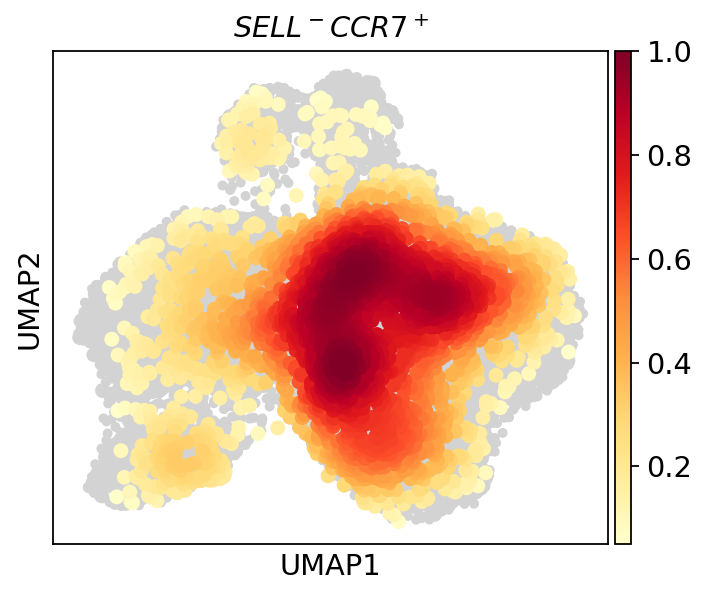

In [19]:
First_gene="CCR7"
Second_gene="SELL"
labels_to_replace = ["$"+Second_gene+"^-"+First_gene+"^-$","$"+Second_gene+"^+"+First_gene+"^+$","$"+Second_gene+"^+"+First_gene+"^-$","$"+Second_gene+"^-"+First_gene+"^+$"]

vedo.obs['All_cells'] = ['All Cells'] * len(vedo.obs)

mock_scat_123 = {First_gene+'_'+Second_gene:{'scatter':[
[(-0.08, 0.08), (-0.08, -0.08), (0.08, -0.08), (0.08, 0.08)],
[(0.18, 3), (0.18, 0.18), (3, 0.18), (3, 3)],
[(-0.08, 0.18), (0.08, 0.18), (0.08, 3), (-0.08, 3)],
[(0.18, 0.08), (0.18, -0.08), (3, -0.08), (3, 0.08)],

]}}

return_scat = scS.pl.scatter(vedo,First_gene,Second_gene,color='All_cells',show=False,palette=[(0.55,0.55,0.75,1)],unselected_cells="All Cells",line_labels=labels_to_replace,mock = mock_scat_123[First_gene+'_'+Second_gene],line_palette=['black',(0,0.3,0,1),(0.6,0.5,0.5,1),(0.3,0.3,0.7,1)],linestyle = ["-","-","--","--"],load="All_cells",line_loc="upper right",line_handlelength=1.1,line_bbox_to_anchor=(1.8,1.02))

return_scat.figure.gca().set_xlabel(xlabel="$CCR7$")
return_scat.figure.gca().set_ylabel(ylabel="$SELL$")
return_scat.figure.savefig("figures/Figure2_6"+ext,bbox_inches='tight')
vedo.obs[First_gene+'_'+Second_gene] = [labels_to_replace[int(ident)-1] if ident != "Other" else "Other" for ident in vedo.obs['All_cells']]

sc.tl.embedding_density(vedo,groupby=First_gene+'_'+Second_gene)
for rep_num,rep_label in enumerate(labels_to_replace):
    sc.pl.embedding_density(vedo,key='umap_density_'+First_gene+'_'+Second_gene,vmin=0.05,save="Figure2_"+str(rep_num+7)+ext,group=rep_label)



/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


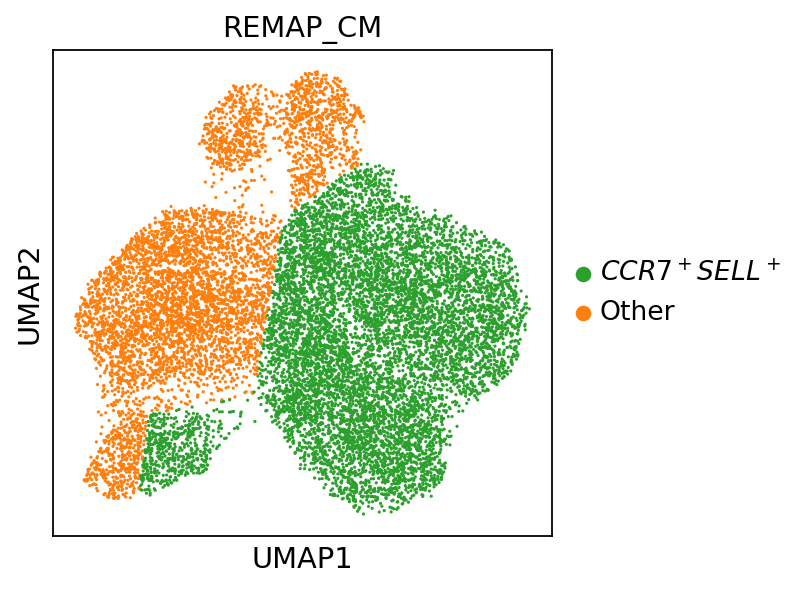

In [20]:
sc.pl.umap(vedo, color = 'REMAP_CM')

In [21]:
scS.tl.cells_per_cluster(vedo,"REMAP_CM")

{'$CCR7^+SELL^+$': 62.57, 'Other': 37.43}

In [22]:
scS.tl.cells_expressing_gene(vedo,"REMAP_CM","CCR7")

{'$CCR7^+SELL^+$': 61.21, 'Other': 19.38}

In [23]:
scS.tl.calculate_TPM(vedo,"REMAP_CM","CCR7",use_raw=False,layer_key="counts")

{'$CCR7^+SELL^+$': 267.51, 'Other': 61.81}

# Subsetting & Normalization

In [24]:
vedo_old = vedo

In [25]:
vedo = sc.read("unnormalized_vedo.h5ad")

In [26]:
vedo.obs["REMAP_CM"] = vedo_old.obs["REMAP_CM"]

In [27]:
EM = vedo[vedo.obs['REMAP_CM'] != "CCR7+SELL+"]

In [28]:
vedo.obs['Keep'] = [True if x in list(EM.obs_names) else False for x in vedo.obs_names]

In [29]:
adata = vedo[vedo.obs['Keep']]

In [30]:
sc.pp.filter_genes(adata, min_cells=1) #We have to removed all genes expressed in less than 1 cell, otherwise the PCA won't work.

#Perform a clustering for scran normalization in clusters
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added='groups', resolution=0.5)

#Preprocess variables for scran normalization
input_groups = adata_pp.obs['groups']
data_mat = adata.X.T

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [31]:

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython



In [32]:
%R library(scran)

array(['scran', 'scuttle', 'SingleCellExperiment', 'SummarizedExperiment',
       'Biobase', 'GenomicRanges', 'GenomeInfoDb', 'IRanges', 'S4Vectors',
       'BiocGenerics', 'stats4', 'MatrixGenerics', 'matrixStats', 'tools',
       'stats', 'graphics', 'grDevices', 'utils', 'datasets', 'methods',
       'base'], dtype='<U20')

In [33]:
%%R -i data_mat -i input_groups -o size_factors
#Adjustment for Bioconducter >= 3.11   
size_factors = sizeFactors(computeSumFactors(SingleCellExperiment(list(counts=data_mat)), clusters=input_groups, min.mean=0.1))


In [34]:

#Delete adata_pp
try:
    del adata_pp
except:
    pass

# Visualize the estimated size factors
adata.obs['size_factors'] = size_factors

#Keep the count data in a counts layer
adata.layers["counts"] = adata.X.copy()
#Normalize adata 
adata.raw = adata
adata.X /= adata.obs['size_factors'].values[:,None]
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=4000)

# Calculate the visualizations
sc.pp.pca(adata, n_comps=8, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.tsne(adata, n_jobs=8) #Note n_jobs works for MulticoreTSNE, but not regular implementation)
sc.tl.umap(adata)
sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)

/home/bioinformatics/anaconda3/envs/test_scselpy/lib/python3.8/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


In [35]:
resolution=[0.1,0.25,0.50,0.75,1,2,5]

for x in resolution:


    # Perform clustering - using highly variable genes
    sc.tl.leiden(adata, resolution=x, key_added='leiden_r'+str(x), random_state=10)

In [36]:
#save subset 
#adata.write("ECM.h5ad")